# 線形SVM
## データセットの生成

In [1]:
from sklearn import datasets

X, y = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=7816)

In [2]:
X.shape, y.shape

((100, 2), (100,))

## データセットの可視化

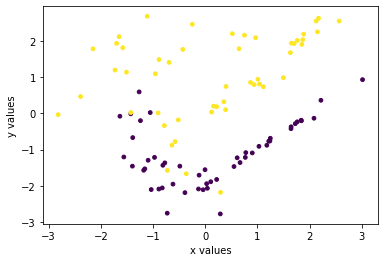

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=y, s=14)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

## データセットの前処理
以下の操作を行う

- Xが含む全ての特徴量を32bit浮動小数点で表現する
- ターゲットラベルは-1または+1でなければならない

In [4]:
import numpy as np

X = X.astype(np.float32)
y = y * 2 - 1

In [5]:
from sklearn import model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

## サポートベクタマシンの構築

In [6]:
import cv2

svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)                # データを直線で分離することを試みるSVM
svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)  # 最適決定境界を探索するための分類器メソッドを呼び出す
_, y_pred = svm.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8

## 決定境界の可視化

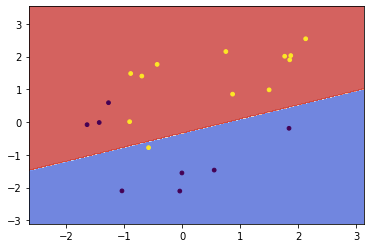

In [8]:
def plot_decision_boundary(svm, X_test, y_test):
    # 左右上下の端にデータ点がのることを避けるために、+1または-1の余白を入れている
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    
    # メッシュグリッドのサンプリング間隔
    h = 0.02
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    
    _, zz = svm.predict(X_hypo)
    
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=14)
    plt.show()

plot_decision_boundary(svm, X_test, y_test)